In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
# Set the option to display all rows
pd.set_option('display.max_rows', None)

In [7]:
# Load the Dataset
data = pd.read_csv("whochosesus.csv")
data.head()

,Reference ID,Record Created Date,College,Primary Inquiry Program,Primary Inquiry Program Term,Application Reference ID,Application Created Date,Application Start Term,Application Program,Admit Date,...,Initial Scholarship,Registered in Colleague,Sex,Race,Age,Citizenship Status,State,Permanent Address Country,GPA,
0,475785217,10/31/2019,College of Education,"Counseling, Clinical Mental Health Counseling ...",Fall 2024,723948798,2/23/2024,Fall 2021,"Counseling, Clinical Mental Health Counseling ...",NaN,...,NaN,No,F,American Indian or Alaska Native,28.0,US,WA,United States,2.8,NaN
1,819824498,4/27/2022,Albers School of Business,Business Analytics - MSBA,Fall 2022,776577478,4/27/2022,Fall 2022,Business Analytics - MSBA,NaN,...,NaN,No,M,American Indian or Alaska Native,26.0,FN,NaN,India,3.3,NaN
2,985723062,8/11/2022,Albers School of Business,Business Analytics - MSBA - Online Instruction,Summer 2023,150532722,8/11/2022,Summer 2023,Business Analytics - MSBA - Online Instruction,NaN,...,NaN,No,F,American Indian or Alaska Native,19.0,FN,NaN,Belize,3.4,NaN
3,694471729,8/26/2022,Non-Matriculated,NaN,NaN,954630851,8/26/2022,Summer 2023,Non-Matriculated status - Nursing,NaN,...,NaN,No,F,American Indian or Alaska Native,34.0,US,WA,United States,2.5,NaN
4,362198468,11/14/2022,College of Science and Engineering,Computer Science - MSCS,Spring 2023,439750128,11/14/2022,Spring 2023,Computer Science - MSCS,NaN,...,NaN,No,F,American Indian or Alaska Native,25.0,FN,NaN,India,3.8,NaN


In [8]:
# Check Data Types and Missing Values
print(data.dtypes)
print("Missing Values:")
data.isnull().sum()

Reference ID                      int64
Record Created Date              object
College                          object
Primary Inquiry Program          object
Primary Inquiry Program Term     object
 Application Reference ID         int64
Application Created Date         object
Application Start Term           object
Application Program              object
Admit Date                       object
Confirmed Date                   object
Decision                         object
Initial Scholarship              object
Registered in Colleague          object
Sex                              object
Race                             object
Age                             float64
Citizenship Status               object
State                            object
Permanent Address Country        object
GPA                             float64
                                float64
dtype: object
Missing Values:


Reference ID                        0
Record Created Date                 0
College                             0
Primary Inquiry Program           513
Primary Inquiry Program Term      513
 Application Reference ID           0
Application Created Date          248
Application Start Term            249
Application Program               248
Admit Date                      19349
Confirmed Date                  22377
Decision                          854
Initial Scholarship             19361
Registered in Colleague             0
Sex                                 0
Race                                0
Age                                 1
Citizenship Status               4339
State                           17497
Permanent Address Country        4700
GPA                             11150
                                26573
dtype: int64

In [9]:
data['Record Created Date'] = pd.to_datetime(data['Record Created Date'], errors='coerce')
data['Application Created Date'] = pd.to_datetime(data['Application Created Date'], errors='coerce')
data['Admit Date'] = pd.to_datetime(data['Admit Date'], errors='coerce')
data['Confirmed Date'] = pd.to_datetime(data['Confirmed Date'], errors='coerce')

# Check data types after conversion
print(data.dtypes)

Reference ID                             int64
Record Created Date             datetime64[ns]
College                                 object
Primary Inquiry Program                 object
Primary Inquiry Program Term            object
 Application Reference ID                int64
Application Created Date        datetime64[ns]
Application Start Term                  object
Application Program                     object
Admit Date                      datetime64[ns]
Confirmed Date                  datetime64[ns]
Decision                                object
Initial Scholarship                     object
Registered in Colleague                 object
Sex                                     object
Race                                    object
Age                                    float64
Citizenship Status                      object
State                                   object
Permanent Address Country               object
GPA                                    float64
             

In [10]:
# Generate summary statistics for numerical columns
print(data.describe())

# For categorical columns, count the unique values
print(data.select_dtypes(include=['object']).nunique())

       Reference ID            Record Created Date   Application Reference ID  \
count  2.657300e+04                          26573               2.657300e+04   
mean   5.571380e+08  2023-01-10 18:48:50.342829056               5.553809e+08   
min    1.111319e+08            2015-04-22 00:00:00               1.111326e+08   
25%    3.357300e+08            2022-03-21 00:00:00               3.327559e+08   
50%    5.570138e+08            2023-02-01 00:00:00               5.532474e+08   
75%    7.805419e+08            2023-12-07 00:00:00               7.758477e+08   
max    9.999962e+08            2025-04-28 00:00:00               9.999840e+08   
std    2.562163e+08                            NaN               2.568605e+08   

            Application Created Date                     Admit Date  \
count                          26325                           7224   
mean   2023-03-24 15:52:17.230769408  2023-05-29 06:37:52.425249536   
min              2016-04-19 00:00:00            2019-02-0

In [20]:
data['Race'].value_counts()

Race
Asian - Indian                                                    6540
Unknown                                                           5926
White - Caucasian/European                                        4645
Black or African American - African                               2790
Asian                                                             1214
More than one race                                                 924
Asian - Chinese                                                    767
Black or African American - Black                                  624
Asian - Pakistani                                                  372
Asian - South Asian                                                354
Asian - Vietnamese                                                 289
Black or African American - African American                       282
Black or African American                                          277
Asian, Asian - Filipino                                            241
A

In [23]:
data['College'].value_counts()

College
College of Science and Engineering    9049
Albers School of Business             7210
College of Arts and Sciences          3964
College of Education                  3634
College of Nursing                    2340
Non-Matriculated                       373
School of Theology and Ministry          2
albers School of Business                1
Name: count, dtype: int64

In [26]:
data['Primary Inquiry Program'].value_counts()

Primary Inquiry Program
Computer Science - MSCS                                                                                         3703
Data Science - MSDS                                                                                             2053
Business Analytics - MSBA                                                                                       1485
Business Administration (Professional) - MBA                                                                    1442
Finance - MSF                                                                                                    995
Computer Science, specialization in Data Science - MSCS                                                          906
Counseling, Clinical Mental Health Counseling specialization - MAED                                              875
Accounting and Analytics - MS                                                                                    803
Counseling, Clinical Mental Health Couns

In [28]:
data['Primary Inquiry Program Term'].value_counts()

Primary Inquiry Program Term
Fall 2023      6010
Fall 2024      5623
Fall 2022      5067
Spring 2024    1161
Summer 2023    1022
Spring 2025     991
Summer 2025     965
Spring 2023     903
Summer 2022     858
Winter 2025     804
Summer 2024     781
Winter 2024     711
Winter 2023     591
Fall 2021       229
Fall 2025       154
Fall 2020        64
Fall 2019        26
Spring 2022      25
Winter 2022      20
Summer 2021      17
Fall 2018         6
Summer 2020       4
Spring 2021       4
Summer 2026       3
Winter 2026       3
Winter 2020       2
Spring 2026       2
Winter 2017       2
Summer 2019       2
Fall 2017         2
Winter 2021       2
Summer 2017       1
Fall 2016         1
Summer 2018       1
Spring 2020       1
Spring 2019       1
Winter 2019       1
Name: count, dtype: int64

In [29]:
data['Application Program'].value_counts()

Application Program
Computer Science - MSCS                                                                                         3653
Data Science - MSDS                                                                                             2055
Business Analytics - MSBA                                                                                       1502
Business Administration (Professional) - MBA                                                                    1482
Finance - MSF                                                                                                   1009
Counseling, Clinical Mental Health Counseling specialization - MAED                                              912
Computer Science, specialization in Data Science - MSCS                                                          895
Accounting and Analytics - MS                                                                                    811
Counseling, Clinical Mental Health Counselin

In [32]:
data['Permanent Address Country'].value_counts()

Permanent Address Country
United States                     8980
India                             7080
Nigeria                            973
Ghana                              642
Kenya                              418
China                              373
Pakistan                           332
Ethiopia                           269
Iran                               241
Bangladesh                         217
The Gambia                         195
Nepal                              174
Canada                             127
Taiwan                             127
Zimbabwe                           114
Uganda                             101
Malawi                              91
Vietnam                             80
Uzbekistan                          58
Tanzania                            55
South Korea                         51
Saudi Arabia                        46
Mongolia                            46
South Africa                        46
Cameroon                            46

In [31]:
data['State'].value_counts()

State
WA    6438
CA     676
OR     236
TX     151
NY      98
CO      97
FL      96
IL      81
HI      75
MN      66
AZ      64
MA      56
UT      55
MI      52
PA      51
VA      47
OH      47
NV      46
NC      44
NJ      43
GA      42
MD      42
MO      40
ID      39
WI      32
TN      29
MT      28
IN      26
AK      25
CT      25
IA      24
NM      17
SC      17
KS      17
AL      14
DC      14
LA      13
NE      11
OK      11
ME      11
ND      11
VT      10
KY      10
MS      10
AR       9
SD       9
WY       6
RI       6
NH       5
DE       2
WV       1
VI       1
Name: count, dtype: int64

In [14]:
data['Decision'].value_counts()

Decision
Application Closed - Awaiting Submission                       12035
Admit Declined                                                  2686
Application Incomplete - Closed                                 2241
Deposit - Not Required                                          2047
Rejected - No Alternatives                                      2039
Admit Declined - Post Enroll(CF)                                1020
Rejected - Soft Deny                                             712
Deposit Paid                                                     555
Update Term - Post Enroll(CF)                                    402
Request to Close                                                 396
Update Term - Post Decision                                      296
Application Closed - Miscellaneous                               164
Update Term - Pre Decision                                       146
Application Closed - Wrong Program/Duplicate Application         131
Waitlist Closed          

In [44]:
# Filter data where Decision is 'Admit Conditional' and Registration is 'Yes'
filtered_data = data[(data['Decision'] == 'Update Term - Post Enroll(CF)') & (data['Registered in Colleague'] == 'No')]

# Get the count of these filtered records
count = filtered_data.shape[0]

# Print the count
print(count)

370


<Axes: xlabel='Sex', ylabel='count'>

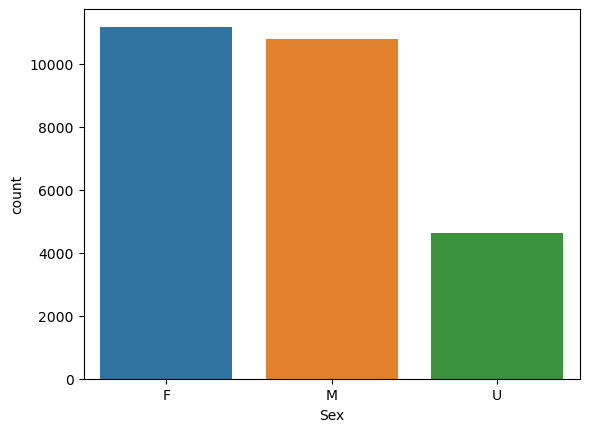

In [39]:
sns.countplot(x='Sex', data=data)

<Axes: xlabel='Citizenship Status', ylabel='count'>

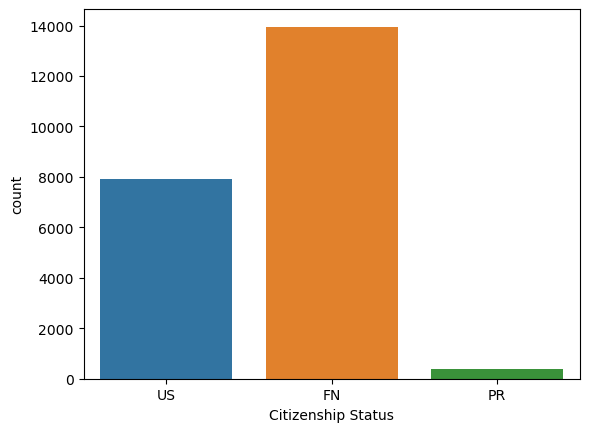

In [30]:
sns.countplot(x='Citizenship Status', data=data)

In [45]:
#####Question 1: 

#Filter rows where both 'Primary Inquiry Program' and 'Application Created Date' are not null
inquiries_apply = data.dropna(subset=['Primary Inquiry Program', 'Application Created Date'])

# Get the count of records that meet this condition
count_inquiries_apply = inquiries_apply.shape[0]

# Print the count
print(count_inquiries_apply)

25812


In [46]:
#####Question 2:
# Filter rows where 'Primary Inquiry Program' is missing (null) but 'Application Created Date' exists (not null)
no_inquiry_program = data[data['Primary Inquiry Program'].isna() & data['Application Created Date'].notna()]

# Get the count of these filtered records
count_no_inquiry_program = no_inquiry_program.shape[0]

# Print the count
print(count_no_inquiry_program)

513
